<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/tutorial_redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arquitecturas de Redes Convolucionales

Ya hemos introducido la arquitectura de `red neuronal convolucional`, un modelo de `red neuronal` especialmente diseñado para trabajar con imágenes en tareas de visión artificial. Entre estas tareas, la más común es la de clasificación de imágenes, que consiste simplemente en asignar una categoría de entre varias a una imagen en particular. Una buena manera para medir el progreso en el campo del `Machine Learning` es a través de `benchmarks` y competiciones en los que investigadores proponen diferentes soluciones a un mismo problema, que se evalúan sobre un mismo conjunto de datos de test oculto. En el campo del `deep learning` y `computer vision`, una de estas competiciones, que hoy en día ya es un `benchmark` establecido, es la clasificación de imágenes en el dataset [Imagenet](http://www.image-net.org/challenges/LSVRC/). En 2012, la primera `red neuronal convolucional` entró en esta competición consiguiendo una mejora de 10 puntos sobre la mejor solución hasta la fecha, lo cual supuso un detonante para el campo del `deep learning`. A partir de ese momento, todas las soluciones ganadoras presentadas durante los años siguientes han sido redes convolucionales, convirtiendo a Imagenet una estupenda fuente de información para conocer los últimos avances en el campo (cuando una nueva arquitectura es diseñada, es práctica común reportar sus prestaciones en Imagenet para poder compararla con otras redes). En este post vamos a revisar algunas de las arquitecturas más conocidas que han aparecido durante los años, las cuales podremos usar para nuestras aplicaciones. Puedes conocer en detalle del progreso de este `benchmark` en [papers with code](https://paperswithcode.com/sota/image-classification-on-imagenet), donde también encontrarás artículos y código en muchísimos otros campos de aplicación.

![](https://www.researchgate.net/profile/Kien_Nguyen26/publication/321896881/figure/fig1/AS:573085821489153@1513645715549/The-evolution-of-the-winning-entries-on-the-ImageNet-Large-Scale-Visual-Recognition.png)

## LeNet-5

Empezamos revisado la primera arquitectura de `CNN` desarrollada. Esta red es conocida por el nombre de LeNet-5 y, si bien no participó en la competición de Imagenet, es interesante conocer esta primera arquitectura.

![](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/lenet-5.png.webp)

Esta `CNN` es alimentada por imágenes de 32x32 píxeles de dígitos manuscritos, y está formada por tres capas convolucionales, dos de las cuales reducen la dimensionalidad de los mapas de características mediante *average pooling*. La salida de la última capa convolucional es conectada un perceptrón multicapa de dos capas, que tienen la responsabilidad de dar la predicción final. A continuación puedes ver un ejemplo de implementación en `Pytorch`.

In [ ]:
import torch

def block(c_in, c_out, k=3, p=1, s=1):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.Tanh(),
        torch.nn.AvgPool2d(2, stride=2)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class LeNet5(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    #self.pad = torch.nn.ConstantPad2d(2, 0.)
    self.conv1 = block(n_channels, 6, 5, p=0)
    self.conv2 = block(6, 16, 5, p=0)
    self.conv3 = torch.nn.Sequential(
        torch.nn.Conv2d(16, 120, 5, padding=0),
        torch.nn.Tanh()
    )
    self.fc1 = block2(120, 84)
    self.fc2 = torch.nn.Linear(84, 10)

  def forward(self, x):
    #x = self.pad(x)
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [ ]:
lenet5 = LeNet5()
output = lenet5(torch.randn(64, 1, 32, 32))
output.shape

torch.Size([64, 10])

## AlexNet

[AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) ganó la competición de Imagenet en 2012. Es una arquitectura similar a LeNet5 pero más profunda. Fue la primera red convolucional que ganó la competición, y también la primera en ser entrenada en GPUs.

![](https://miro.medium.com/fit/c/1838/551/1*arJJYgK-_7VcuKKX1TCKMA.png)

Tanto esta red como muchas otras las podemos encontrar ya implementadas en varios paquetes. En `Pytorch` podemos descargar redes convolucionales con el paquete `torchvision`.

In [ ]:
import torchvision

alexnet = torchvision.models.AlexNet()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
output = alexnet(torch.randn(64, 3, 224, 224))
output.shape

torch.Size([64, 1000])

El dataset Imagenet contiene imágenes comunes descargadas de internet, y el objetivo es el de clasificar imágenes entre 1000 clases diferentes. Es por este motivo que verás que los diferentes modelos en `torchvision` tienen una última capa lineal con 1000 salidas.

## GoogLeNet

Ganadora de la edición de 2014, GoogLeNet es una red mucho más profunda (podemos empezar a ver la tendencia de que cuantas más capas, mejor resultados). Sus desarrolladores implementaron los módulos *inception*, los cuales aplican diferentes capas convolucionales, con diferentes tamaños de filtros, en paralelo sobre las mismas entradas y luego concatenan las salidas. Además, para poder entrenar esta red tan profunda, se llevan a cabo predicciones en diversas capas intermedias para poder tener gradientes fluyendo hacia las capas iniciales.

![](https://www.alanzucconi.com/wp-content/uploads/2015/07/googlenet-arch.png)

In [ ]:
googlenet = torchvision.models.GoogLeNet()
googlenet

/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
output = googlenet(torch.randn(64, 3, 224, 224))
output[0].shape

torch.Size([64, 1000])

## VGG

Si bien [VGG](https://arxiv.org/abs/1409.1556) no ganó, tuvo mucho éxito ya que sentó un precedente en el patrón del diseño de las redes convolucionales. Este patrón consiste en usar siempre capas convolucionales con filtros de 3x3, *stride* y *padding* 1 (manteniendo el tamaño de las entradas constante) y usar *max pool* para reducir a la mitad los mapas de características. Además, después de cada capa se dobla el número de filtros.

![](http://jesusutrera.com/articles/img/vgg_model.png)

In [ ]:
# existen dos variantes: vgg16 y vgg19, con 16 y 19 capas respectivamente

vgg16 = torchvision.models.vgg16()
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
output = vgg16(torch.randn(64, 3, 224, 224))
output.shape

torch.Size([64, 1000])

## ResNet

[ResNet](https://arxiv.org/abs/1512.03385) fue el campeón en 2015. La variante ganadora tenía 152 capas y confirmó la tendencia de profundizar con menos parámetros. La clave para entrenar redes tan profundas es el uso de *skip connections* donde la señal que entra a una capa también se agrega a la salida. Esto proporciona una ruta limpia para que el gradiente se propague desde la salida a la entrada. También se puede interpretar como una forma de dejar a la red la decisión de qué capas usar (si alguna capa no es necesaria, simplemente se la puede saltar).

![](https://i.stack.imgur.com/XTo6Q.png)

In [ ]:
# existen varias variantes: resnet18, resnet35, resnet50, resnet101, resnet152

resnet34 = torchvision.models.resnet34()
resnet34

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
output = resnet34(torch.randn(64, 3, 224, 224))
output.shape

torch.Size([64, 1000])

## Otras arquitecturas

Tras la finalización de la competición de Imagenet, nuevas arquitecturas han aparecido (y siguen apareciendo) que mejoran considerablemente las redes vistas anteriormente. Algunos ejemplos son:

- Xception (2016): mejora sobre GoogLeNet (básicamente, GoogLeNet + ResNet)
- SENet (2017): Añade los bloques *SE* a GoogLeNet y ResNet.
- MobileNet (2017): família de CNNs especialmente diseñadas para trabajar en dispositivos con pocos recursos computacionales como smartphones.
- EfficientNet (2019): família de redes diseñadas mediante algoritmos de `Inteligencia Artificial`(IA haciendo IA 🤯). Mejores prestaciones con menos parámetros.

## Resumen

En este tutorial hemos presentado diferentes arquitecturas de `redes convolucionales` que se han desarrollado durante los últimos años. Estas redes han destacado por sus buenos resultados en el dataset Imagenet, una competición muy conocida en el mundo del `deep learning` para `computer vision` y `benchmark` establecido en el que todas las nuevas arquitecturas se evalúan para poder compararlas. Como hemos visto, las redes con mejores resultados son redes muy profundas (con muchas capas) y parámetros. Esto es un problema si queremos entrenar una de ellas desde cero en algún problema concreto. Afortunadamente, no sólo podemos aprovechar la arquitectura sino que podemos descargar también los parámetros entrenados y utilizarlos como estado inicial para nuestra aplicación. Esta técnica es conocida como transfer learning, y nos permite conseguir buenos modelos con menor requisitos computacionales. En el próximo post veremos como llevar a cabo esta técnica de manera sencilla.

# PyTorch 1.2

"Sobre los bloques básicos de PyTorch para construir y entrenar un modelo CNN para la clasificación de imágenes".

En este tutorial de código aprenderemos a entrenar rápidamente un modelo para entender algunos de los bloques básicos de PyTorch para entrenar un modelo de aprendizaje profundo. Este cuaderno está inspirado en el cuaderno ["Tensorflow 2.0 Quickstart for experts"](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb#scrollTo=DUNzJc4jTj6G).



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
print(torch.__version__)

2.1.0+cu121


## Importar los datos
El primer paso antes de entrenar el modelo es importar los datos. Utilizaremos el [MNIST dataset](http://yann.lecun.com/exdb/mnist/) que es como el Hello World dataset del aprendizaje automático.

Además de importar los datos, haremos algunas cosas más:
- Transformaremos los datos en tensores utilizando el módulo `transforms`.
- Utilizaremos `DataLoader` para construir cargadores de datos convenientes o lo que se conoce como iteradores, lo que facilita la alimentación eficiente de datos por lotes a los modelos de aprendizaje profundo.
- Como se ha indicado anteriormente, también crearemos lotes de datos estableciendo el parámetro `batch` dentro del cargador de datos. Fíjate en que en este tutorial usamos lotes de `32`, pero puedes cambiarlo a `64` si quieres. Te animo a experimentar con diferentes lotes

In [ ]:
%%capture
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

## Explorar los datos
Es divertido y una buena práctica para asegurarse de que todo está en orden. Vamos a comprobar lo que contiene el conjunto de datos de entrenamiento y de prueba. Utilizaré `matplotlib` para imprimir algunas de las imágenes de nuestro conjunto de datos.

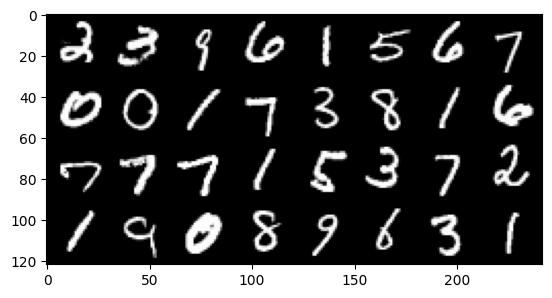

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))

**EJERCICIO:** Trate de entender lo que el código anterior está haciendo.Esto le ayudará a entender mejor su conjunto de datos antes de seguir adelante.

In [ ]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## El Modelo
Ahora, utilizando la tubería clásica del marco de aprendizaje profundo, vamos a construir el modelo de 1 capa convolucional.

Aquí hay algunas notas para aquellos que están empezando con PyTorch:
- El modelo a continuación consta de una parte `__init__()` que es donde se incluyen las capas y componentes de la red neuronal. En nuestro modelo, tenemos una capa convolucional denotada por `nn.Conv2d(...)`. Se trata de un conjunto de datos de imágenes en escala de grises, por lo que sólo necesitamos un canal, de ahí "in_channels=1`. Esperamos obtener una buena representación de esta capa, por lo que utilizamos `out_channels=32`. El tamaño del núcleo es 3, y para el resto de parámetros utilizamos los valores por defecto que puedes encontrar [aquí](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#conv2d).
- Usamos 2 capas densas espalda con espalda o lo que llamamos transformaciones lineales de los datos entrantes. Observe que para `d1` tengo una dimensión que parece haber salido de la nada. 128 representa el tamaño que queremos como salida y (`26*26*32`) representa la dimensión de los datos entrantes. Si quieres saber cómo calcular estos números consulta la [documentación de PyTorch](https://pytorch.org/docs/stable/nn.html?highlight=linear#conv2d). En resumen, la capa convolucional transforma los datos de entrada en una dimensión específica que tiene que ser considerada en la capa lineal. Lo mismo se aplica para la segunda transformación lineal (`d2`) donde la dimensión de la salida de la capa lineal anterior se añadió como `in_features=128`, y `10` es sólo el tamaño de la salida que también corresponde al número de clases.
- Después de cada una de esas capas, aplicamos también una función de activación como `ReLU`. Para la predicción, aplicamos una capa `softmax` a la última transformación y devolvemos el resultado.


In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
#Se prueba el modelo con un lote

model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


## Entrenamiento del modelo
Ahora estamos listos para entrenar el modelo, pero antes vamos a configurar una función de pérdida, un optimizador y una función para calcular la precisión del modelo.

In [ ]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## calcular el accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

Ahora toca entrenar.

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## etapa de formación
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## actualizar parámetros del modelo
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)

    model.eval()
    print('Epoca: %d | Perdida: %.4f | Accuracy Entranamiento: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))

También podemos calcular la precisión en el conjunto de datos de prueba para ver el rendimiento del modelo en la tarea de clasificación de imágenes. Como se puede ver a continuación, nuestro modelo CNN básico funciona muy bien en la tarea de clasificación MNIST.

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

print('Test Accuracy: %.2f'%( test_acc/i))

**EJERCICIO**

Como una forma de practicar, trate de incluir la parte de prueba dentro del código donde estaba dando salida a la precisión de entrenamiento, de modo que también puede seguir probando el modelo en los datos de prueba a medida que avanza con los pasos de entrenamiento.

Esto es útil ya que a veces no se quiere esperar hasta que el modelo haya completado el entrenamiento para probar el modelo con los datos de prueba.
